In [38]:
from scipy.io import wavfile
import IPython.display as ipd
import numpy as np
import scipy.signal as ss
import matplotlib.pyplot as plt

In [1]:
# play a few sample files
fname = 'sample.wav'
ipd.Audio(fname)

In [2]:
rate, data = wavfile.read(fname)
print('Sampling (frame) rate = {}'.format(rate))
print('Total samples (frames) = {}'.format(data.shape[0]))
duration = data.shape[0] / rate
print('Duration = {:.1f} s'.format(duration))

Sampling (frame) rate = 44100
Total samples (frames) = 936684
Duration = 21.2 s


In [7]:
data.dtype

dtype('int16')

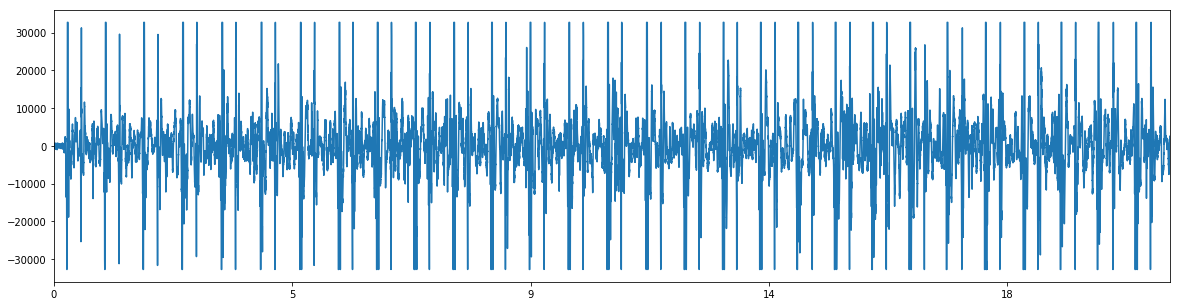

In [11]:
plt.figure(figsize=(20, 5))
plt.plot(data)
ticks, labels = plt.xticks()
plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
plt.xlim(0, duration * rate)
plt.show()

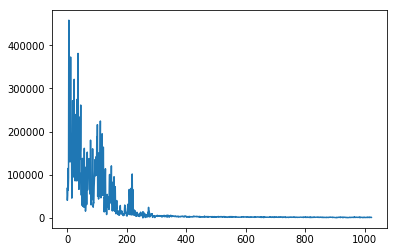

In [20]:
nfft = 8192
plt.plot(np.abs(np.fft.fft(data, nfft)[:nfft//8]))

In [21]:
rate, data = wavfile.read('sample2.wav')
print('Sampling (frame) rate = {}'.format(rate))
print('Total samples (frames) = {}'.format(data.shape[0]))
duration = data.shape[0] / rate
print('Duration = {:.1f} s'.format(duration))

Sampling (frame) rate = 44100
Total samples (frames) = 1058400
Duration = 24.0 s


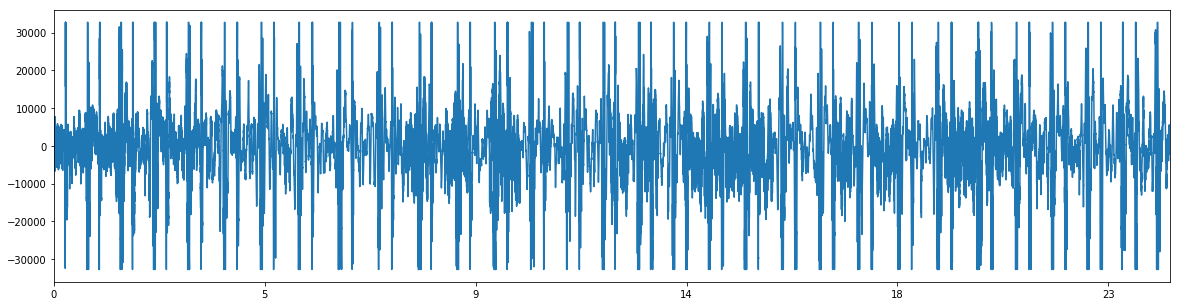

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(data)
ticks, labels = plt.xticks()
plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
plt.xlim(0, duration * rate)
plt.show()

In [23]:
rate, data = wavfile.read('background.wav')
print('Sampling (frame) rate = {}'.format(rate))
print('Total samples (frames) = {}'.format(data.shape[0]))
duration = data.shape[0] / rate
print('Duration = {:.1f} s'.format(duration))

Sampling (frame) rate = 44100
Total samples (frames) = 867888
Duration = 19.7 s


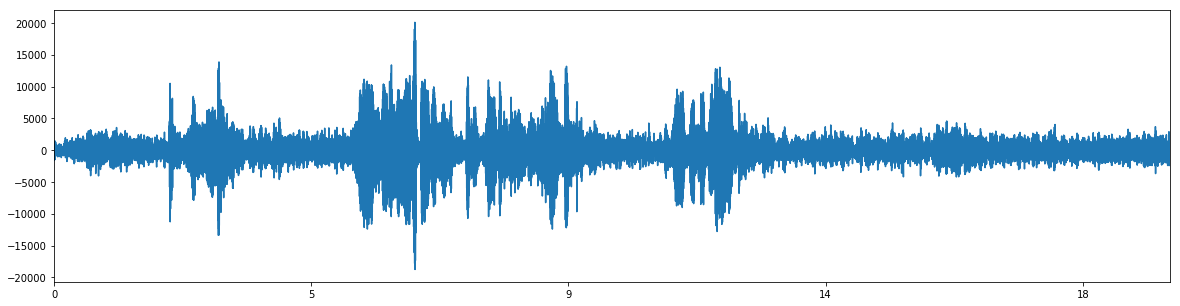

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(data)
ticks, labels = plt.xticks()
plt.xticks(ticks, map(lambda val: '{:.0f}'.format(val), ticks / rate))
plt.xlim(0, duration * rate)
plt.show()

In [25]:
rate, data = wavfile.read('sample2.wav')
print('Sampling (frame) rate = {}'.format(rate))
print('Total samples (frames) = {}'.format(data.shape[0]))
duration = data.shape[0] / rate
print('Duration = {:.1f} s'.format(duration))

Sampling (frame) rate = 44100
Total samples (frames) = 1058400
Duration = 24.0 s


In [34]:
hr = np.array([float(x) for x in data])
print(hr.dtype)

float64


In [42]:
hr_mean = np.mean(hr)
hr -= hr_mean
hr_ft = np.abs(np.fft.rfft(hr))

tsamp = 1.0 / rate
print(tsamp)
hr_freq = np.fft.rfftfreq(len(hr), d=tsamp)

2.2675736961451248e-05


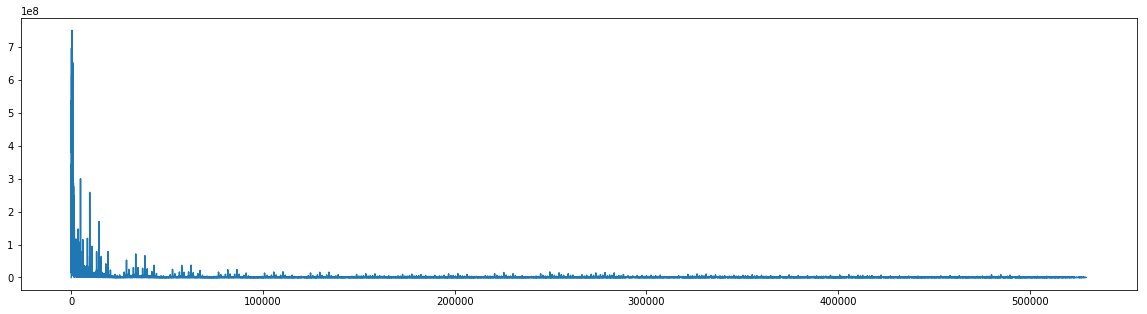

In [46]:
plt.figure(figsize=(20, 5))
plt.plot(hr_ft)
plt.show()

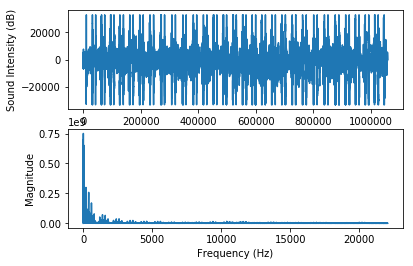

In [44]:
# # find peak
# hrFTMean = np.mean(hrFT)
# peaks = hrFT - (3 * hrFTMean)
# peaks[peaks < 0] = 0.0
# peakIdx = ss.find_peaks_cwt(peaks, [4])
# #print(peakIdx)
# #print(hrFreq[peakIdx[0]])
# hrEst = hrFreq[peakIdx[0]] * 60
# print("Estimated heart rate =", hrEst, "bpm")

plt.subplot(2, 1, 1)
#plt.plot((hr.values[:,0] - hr.values[0,0]) / 1000, hr.values[:,1])
plt.plot(hr)
plt.xlabel("Time Since Start (s)")
plt.ylabel("Sound Intensity (dB)")
plt.subplot(2, 1, 2)
plt.plot(hr_freq, hr_ft)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()